In [6]:
#Install all the Reqiuired Libraries and Packages
from keras.layers import Dropout, Dense, TimeDistributed
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LSTM
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
import soundfile
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa as lr
import os
import glob
import pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')
#All the Required Packages and Libraies are installed.


In [7]:
#Loading the required RAVDESS DataSet with length of 1439 Audio Files
os.listdir(
    path='D:\GitHub2\Speech_Emotion_Detection\speech-emotion-recognition-ravdess-data')


def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles


dirName = 'D:\GitHub2\Speech_Emotion_Detection\speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)


1439

In [5]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r = sr.Recognizer()
for file in range(0, len(listOfFiles), 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')


is it talking by the door
dog sitting by the door
talk to Siri why the door
error
error
error
dog sitting by the door
change your talking by the door
kids talking by the door
dogs sitting by the door
sitting by the
kids talking by the door
talking by the door
dog sitting by the door
error
talking by the door
error
sitting by the door
error
kids talking by the door
khesa talking by the door
error
error
kids talking by the door
talking by the door
dogs sitting by the door
sitting by the door
talking by the door
is a talking by the door
the door
error
the door
Earth talking by the door
frogs are sitting by the door
dogs are sitting at the door
talking by the door
kids talking by the door
dogs sitting by the door
dogs sitting by the door
f****** by the door
is the talking to the door
Rockstar ceiling by the door
ceiling by the
error
khinch
sitting by the door
coronavirus
kids talking by the door
talking by the door
tour tour
exit the door
kids talking
kids talking by the door
dogs sitting 

error
jobs in by the door
error
error
error
staring at the door
kids talking brother
talking brother
toxicity
error
kids talking body
kids talk about
error
error
kg chocolate
error
dogs 7
dogs
talking by the door
kids talking by the door
transistor inverter
dogs sitting by the door
parking
trujet
error
error
kg theatre Coimbatore
khesari.in
error
Raja Singh
error
Satta King
Tods shoes
Bobby Deol
kids talking point
kids talking brother
dogs sitting
error
photo photo
error
error
error
pk Satta King
Kidhar bhag 2
talk to Siri
accessories
error
error
error
Cricbuzz
talking to work
kids talking to her
largest river in the world
Tarzan cinema network
kids talking brother
keep talking
error
error
talk about the world
kids talking about the door
Syrian border door
error
talking
talking by the door
setting border to word
Siri
kids talking by the river
kids are talking by the door
setting
dogs of sitting by the door
error
talking by the door
restaurant By The River
dog resting by the door
the ta

jobs at sitting by the tower
the talking by the door
Chintu talking by the door
sitting by the door
sitting by the door
talking by the door
talking by the door
sitting
dogs are sitting by the
the talking by the tower
talking by the door
jobs at setting by the door
sitting by the door
error
hot seen by the tour
dogs sitting by the tour
Australian by the tour
or
or
sitting by the door
dogs are sitting by the door
by the door
talking by the door
don't standing by the door
Australian dollar
error
talking
dogs are sitting by the tomorrow
sitting
thought in Bible
13 B
error
error
error
error
sitting by the donor
dog sitting by the demo
kids at 14 by the door
68
dogs are sitting by the door
sitting by the door
talking
or
sitting by the door
error
talking but the door
talking by the door
stop that
by the door
kids talking by the door
kids talking by the door
dogs setting baddua
dogs sitting by the door
kids talking by the door
kids talking by the door
dogs sitting by the door
dogs are sitting 

thought in BI with over
dogs sitting by the door
dogs are sitting by the door
kids all talking by the door
hopping by the door
dogs are sitting by the door
dogs are sitting by the door
shit talking by the tour
kids hot hot b o
thoughts with sitting by the door
dogs are sitting by the door
error
error
error
error
kids are talking Barbie tour
Kids Art Hawking bye winter
torque setting by which tower
setting by
hot mother
error
dog sitting by the door
dogs are sitting by which war
talking by the door
error
error
Tola Tola
talking potato
hotstar
error
talked just sitting at the door


In [8]:
import matplotlib.pyplot as plt


In [9]:
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import glob,pickle
from glob import glob
import os
import glob
import librosa
import numpy as np
import pickle


In [10]:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording and audio file has been saved")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording and audio file has been saved


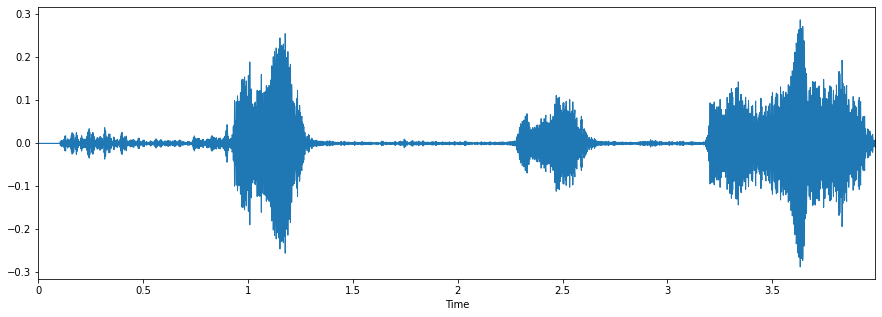

In [5]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('output10.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)